In [287]:
import nibabel as nib

import pandas as pd


In [288]:
behavior = pd.read_csv("subj02/behavior/subj02.csv")

In [289]:
# import beta image
im = nib.load("subj02/1stLevel_nob0_MVPA_trial_smooth/beta_0001.nii")
data = im.get_fdata()

In [290]:
data[1,1,1]

nan

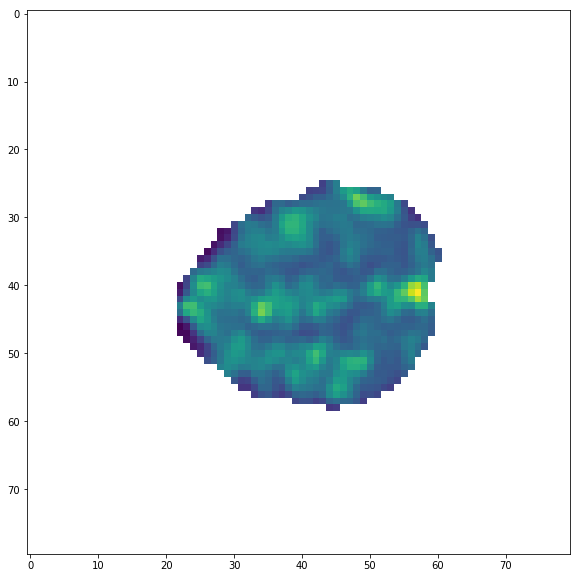

In [291]:
plt.imshow(data[:,:,30])

In [292]:
import raster_geometry as rg
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import numpy as np

/Users/lugrinclaire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 40)

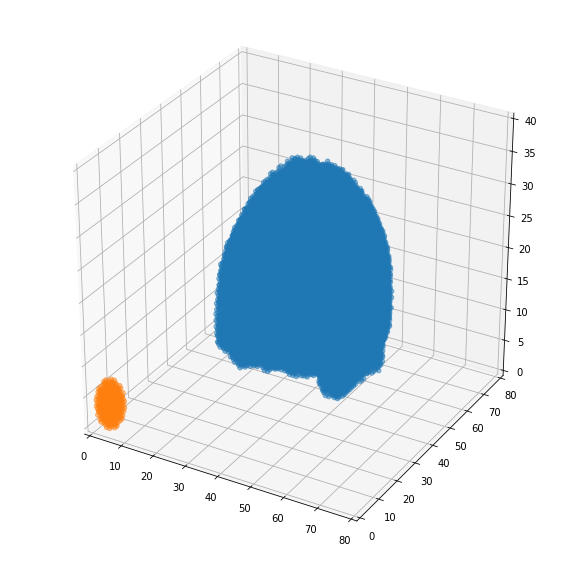

In [293]:

# brain
x, y, z = np.where(data>0)

# ROI
radius=4
center=(0.5)
arr = rg.sphere(radius*2, radius,center)  


plt.rcParams["figure.figsize"] = [10,10]

fig = plt.figure()
ax = fig.gca(projection='3d')
             
ax.scatter(x, y, z, cmap=plt.cm.YlGnBu_r,alpha=0.5)


# ROI
x2, y2, z2 = np.where(arr==1)
ax.scatter(x2, y2, z2, cmap=plt.cm.YlGnBu_r,alpha=0.5)

ax.set_xlim(0,80)
ax.set_ylim(0,80)
ax.set_zlim(0,40)

In [294]:
nb_vox_square_roi=arr.shape[0]

In [295]:
coord_brain=np.argwhere(~np.isnan(data))

In [296]:
coord_brain.shape[0]

41712

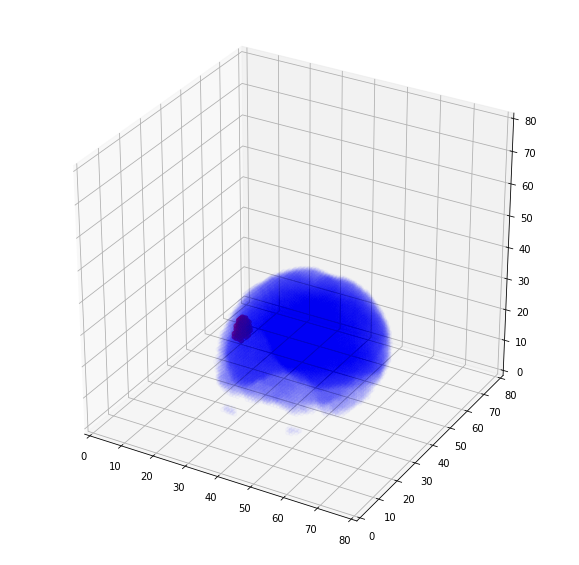

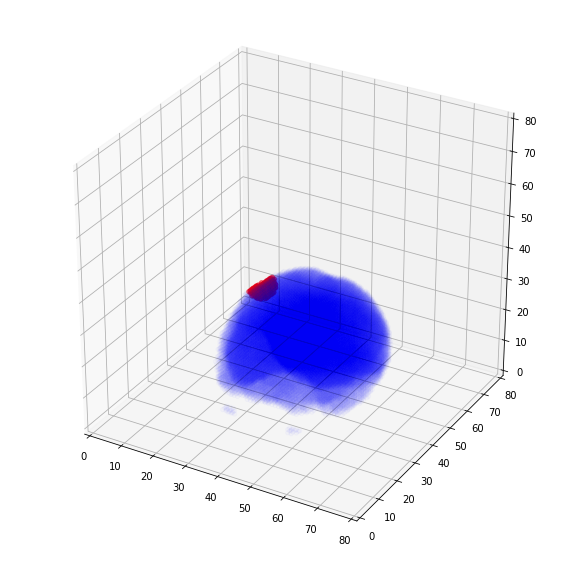

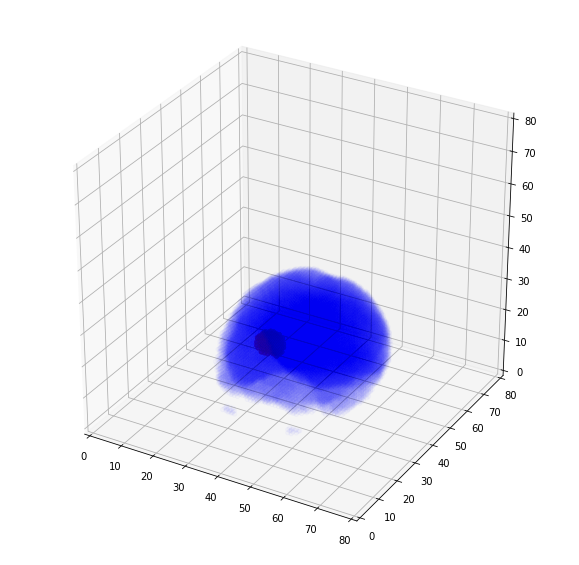

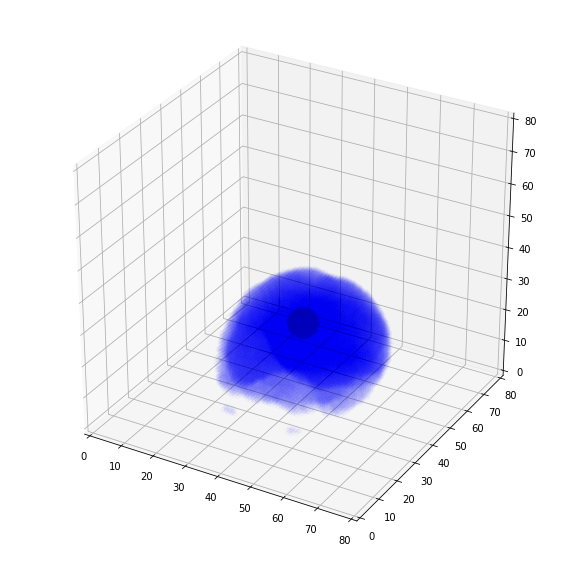

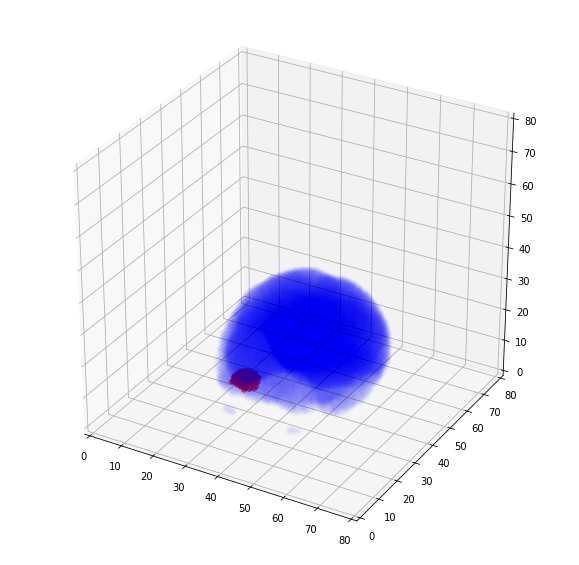

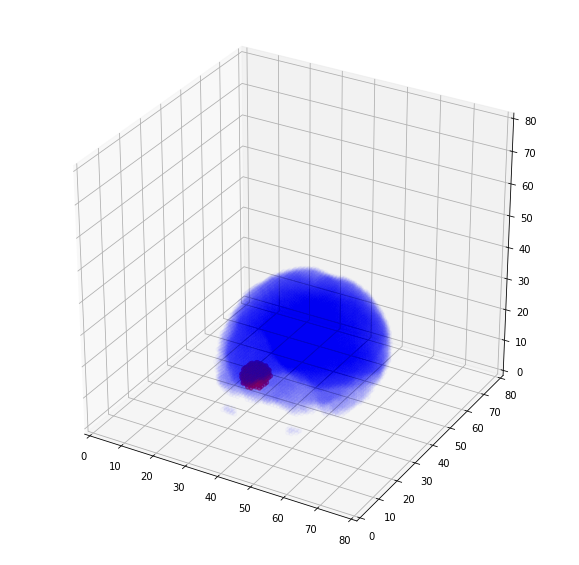

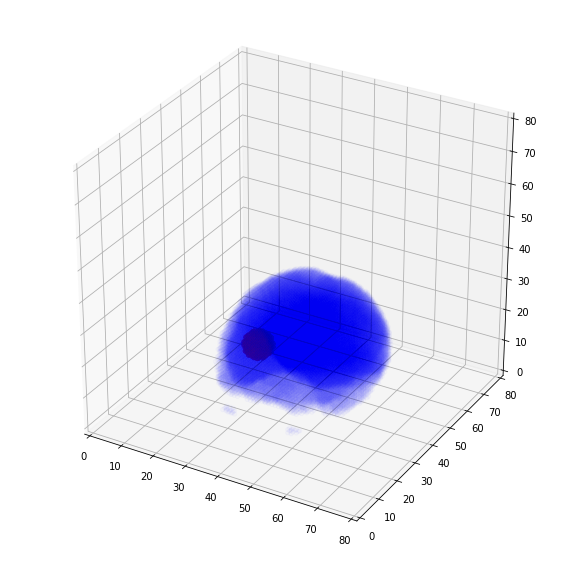

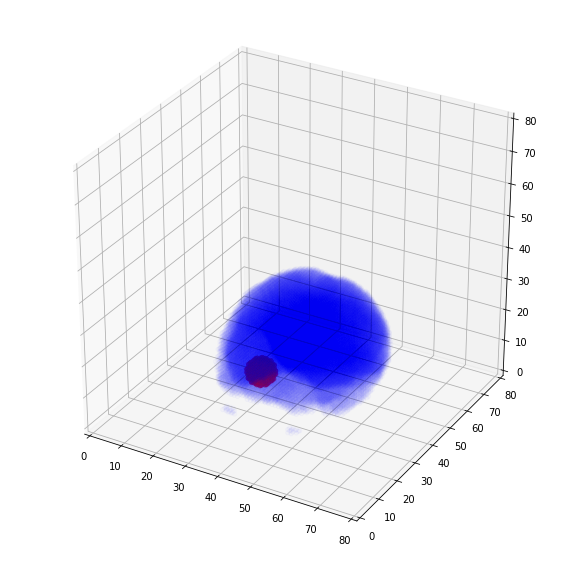

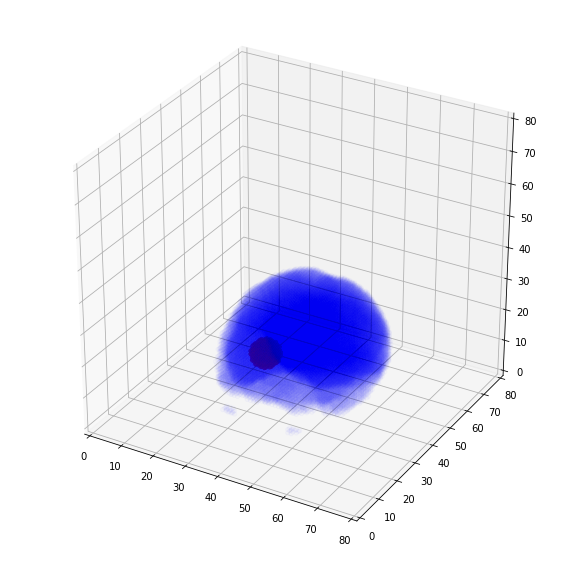

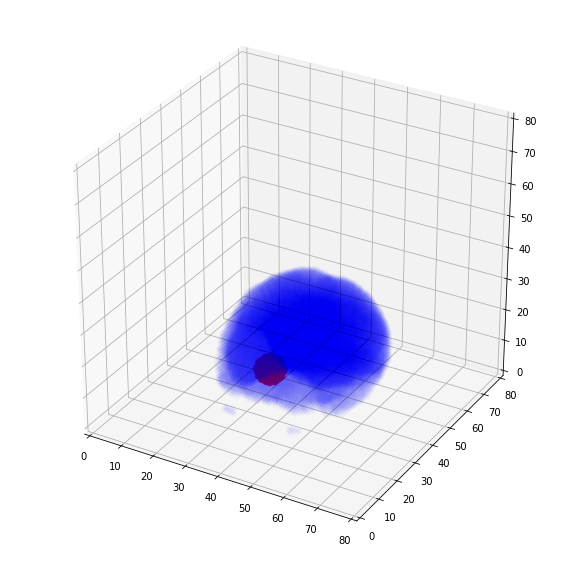

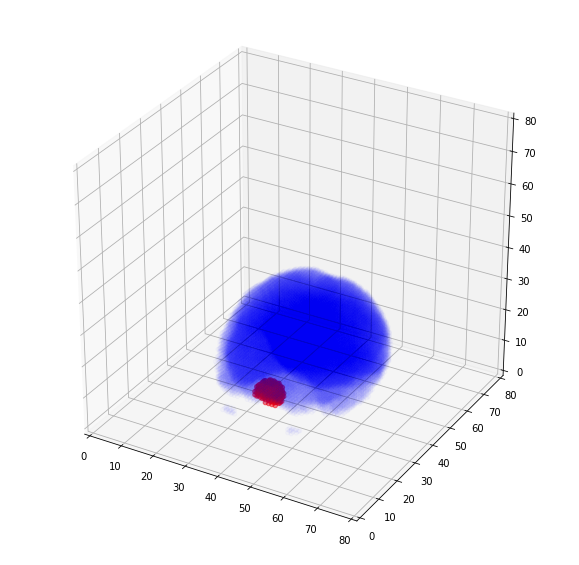

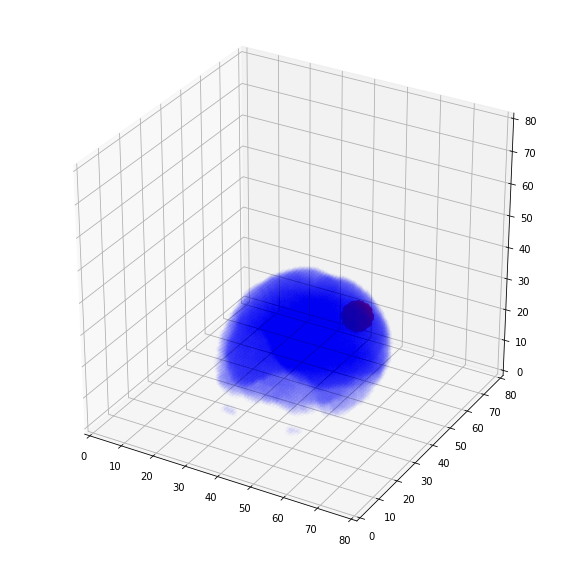

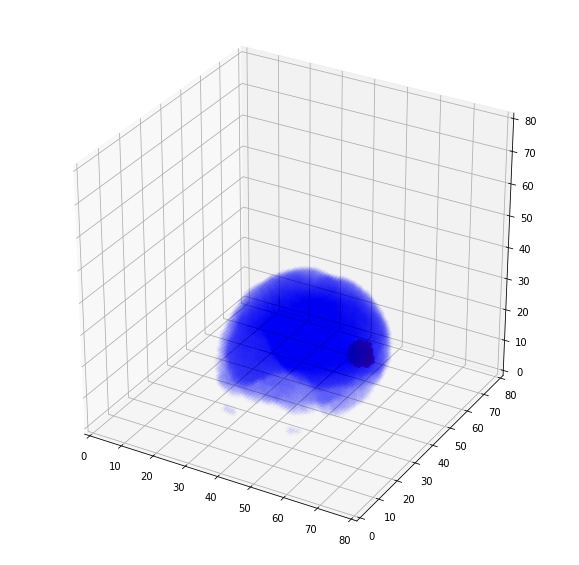

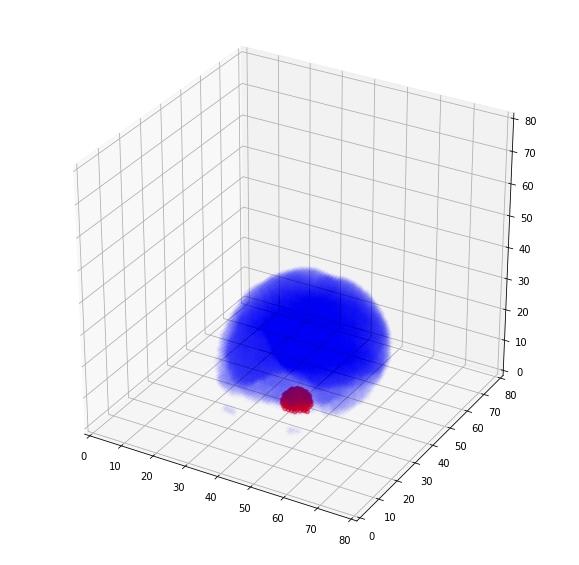

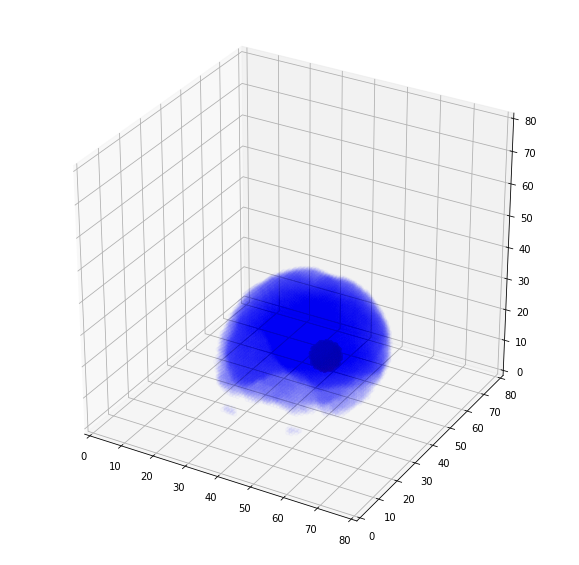

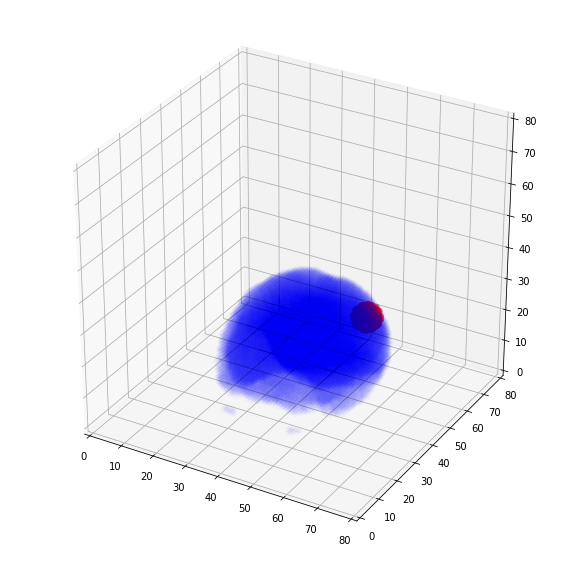

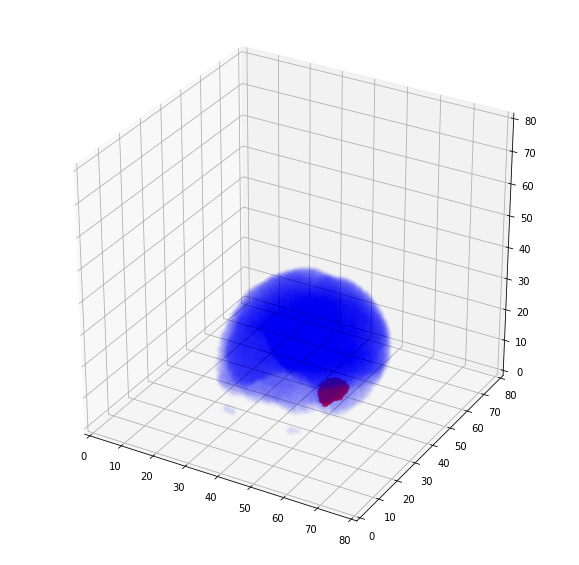

In [315]:
#coord_brain.shape[0]
for vox in range(0,coord_brain.shape[0],2500):
    
    data_roi=np.copy(data)
    data_roi[:] = np.nan
    
    #localisation of the center voxel
    coord_center = coord_brain[vox,:]
    
    # sphere around it
    
    # square
    dat_roi=data[coord_center[0]-radius:coord_center[0]+radius,coord_center[1]-radius:coord_center[1]+radius,coord_center[2]-radius:coord_center[2]+radius]
    
    #multiply by sphere
    roi_sphere=np.multiply(dat_roi,arr)
    roi_sphere[roi_sphere==0]=np.nan
    
    # replace in the big array
    data_roi[coord_center[0]-radius:coord_center[0]+radius,coord_center[1]-radius:coord_center[1]+radius,coord_center[2]-radius:coord_center[2]+radius]=roi_sphere
    
    #plot the brain and the ROI

    plt.rcParams["figure.figsize"] = [10,10]

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # brain
    x, y, z = np.where(~np.isnan(data))
    ax.scatter(x, y, z, cmap=plt.cm.YlGnBu_r,color='blue',alpha=0.02)

    # ROI
    x2, y2, z2 = np.where(~np.isnan(data_roi))
    ax.scatter(x2, y2, z2, cmap=plt.cm.YlGnBu_r,color='red',alpha=0.5)

    ax.set_xlim(0,80)
    ax.set_ylim(0,80)
    ax.set_zlim(0,80)
